# Projet python 

## Bruno Pincet, Quentin Navarre

### Dataset source: 

In [1]:
from IPython.display import IFrame
IFrame('https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29', width=800, height=450)

## 1.Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as geo
import folium
import random
from mapping_data import *
from pywaffle import Waffle


In [3]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data")


In [4]:
df.head()

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


CL0 Never Used 
CL1 Used over a Decade Ago 
CL2 Used in Last Decade 
CL3 Used in Last Year
CL4 Used in Last Month 
CL5 Used in Last Week 
CL6 Used in Last Day 

In [5]:
df.loc[len(df)]=df.columns
df.columns=(["id","age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss",
 "alcohol","amphet","amyl","benzos","caff","cannabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh",
 "lsd","meth","mushrooms","nicotine","semer","vsa"])
df["id"]=df["id"].astype(int)
df = df.set_index("id")
df.sort_index(inplace=True)
for i in range(12):
    df.iloc[:,i]=df.iloc[:,i].astype(float)
df.head()


,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
df["age"]=df.age.map(age)
df["gender"]=df.gender.map(gender)
df["education"]=df.education.map(education)
df["country"]=df.country.map(country)
df["ethnicity"]=df.ethnicity.map(ethnicity)
df["nscore"]=df.nscore.map(nscore)
df["escore"]=df.escore.map(escore)
df["oscore"]=df.oscore.map(oscore)
df["ascore"]=df.ascore.map(ascore)
df["cscore"]=df.cscore.map(cscore)

df["alcohol"]=df.alcohol.map(drogue)
df["amphet"]=df.amphet.map(drogue)
df["amyl"]=df.amyl.map(drogue)
df["benzos"]=df.benzos.map(drogue)
df["caff"]=df.caff.map(drogue)
df["cannabis"]=df.cannabis.map(drogue)
df["choc"]=df.choc.map(drogue)
df["coke"]=df.coke.map(drogue)
df["crack"]=df.crack.map(drogue)
df["ecstasy"]=df.ecstasy.map(drogue)
df["heroin"]=df.heroin.map(drogue)
df["ketamine"]=df.ketamine.map(drogue)
df["legalh"]=df.legalh.map(drogue)
df["lsd"]=df.lsd.map(drogue)
df["meth"]=df.meth.map(drogue)
df["mushrooms"]=df.mushrooms.map(drogue)
df["nicotine"]=df.nicotine.map(drogue)
df["semer"]=df.semer.map(drogue)
df["vsa"]=df.vsa.map(drogue)

In [7]:
dfnan = df[df.isna().any(axis=1)]
#we observe that Nan value wich correspond to unreferenced value in the documentation correspond only to the ID 1.
#Thus we have decided to drop this row from our dataframe.
df=df.iloc[1:]
df.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,
2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,34,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
4,18-24,Female,Masters degree,UK,White,34,34,46,47,46,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used
6,65+,Female,Left school at 18 years,Canada,White,29,38,35,55,52,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used


## 2. Data Analysis

C:\Users\bruno\Anaconda3\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


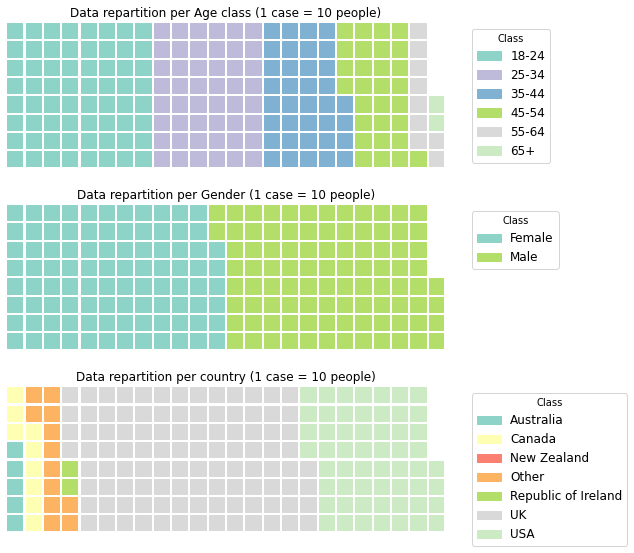

In [8]:
dfage=df.groupby('age').size().reset_index(name='counts')
dfsex=df.groupby('gender').size().reset_index(name='counts')
dfcountry=df.groupby('country').size().reset_index(name='counts')


dfage["counts"]=dfage["counts"]/10
dfsex["counts"]=dfsex["counts"]/10
dfcountry["counts"]=dfcountry["counts"]/10


cate = dfage.shape[0]
cate2= dfsex.shape[0]
cate3= dfcountry.shape[0]


colors = [plt.cm.Set3(i/float(cate)) for i in range(cate)]
colors2 = [plt.cm.Set3(i/float(cate2)) for i in range(cate2)]
colors3 = [plt.cm.Set3(i/float(cate3)) for i in range(cate3)]


fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    figsize=(10, 8),
    plots={
        '311': {
            'values': dfage['counts'],
            'labels': ["{1}".format(n[0], n[1]) for n in dfage[['age', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': 'Data repartition per Age class (1 case = 10 people)', 'loc': 'center', 'fontsize':12},
            'colors': colors
        },
        '312': {
            'values': dfsex['counts'],
            'labels': ["{1}".format(n[0], n[1]) for n in dfsex[['gender', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': 'Data repartition per Gender (1 case = 10 people)', 'loc': 'center', 'fontsize':12},
            'colors': colors2
        },
        '313': {
            'values': dfcountry['counts'],
            'labels': ["{1}".format(n[0], n[1]) for n in dfcountry[['country', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': 'Data repartition per country (1 case = 10 people)', 'loc': 'center', 'fontsize':12},
            'colors': colors3
        },
    },
)     

In [9]:
df.groupby("age").agg({"nscore":(np.average,np.std),"escore":(np.average,np.std),"oscore":(np.average,np.std),"ascore":(np.average,np.std),"cscore":(np.average,np.std)})

nscore               escore               oscore            \
         average       std    average       std    average       std   
age                                                                    
18-24  37.041991  9.421248  39.662519  7.249854  47.825816  6.241317   
25-34  36.515593  9.216169  39.943867  7.064212  45.490644  6.869347   
35-44  35.822535  8.909434  39.002817  6.341282  44.008451  6.429754   
45-54  33.965986  8.271762  39.765306  6.066977  44.268707  5.872877   
55-64  32.419355  8.283460  39.258065  5.725426  44.623656  6.490652   
65+    31.833333  9.319493  36.722222  4.169999  40.833333  8.576644   

          ascore               cscore            
         average       std    average       std  
age                                              
18-24  42.264386  6.517536  39.494557  7.413754  
25-34  43.029106  6.842513  41.962578  6.685078  
35-44  42.777465  5.994211  42.425352  6.600114  
45-54  44.149660  6.026510  43.057823  6.133892  
55-64  42.655914  6.013562  42.440860  6.323631  
65+    42.222222  7.191135  45.611111  5.370276

In [10]:
df.groupby("gender").agg({"nscore":np.average,"escore":np.average,"oscore":np.average,"ascore":np.average,"cscore":np.average})

,nscore,escore,oscore,ascore,cscore
gender,,,,,
Female,36.562168,39.994687,44.829968,44.293305,42.719447
Male,35.278897,39.162248,46.628844,41.448568,40.156946


In [11]:
dfAD=df.groupby(["age","ecstasy"]).size().unstack(fill_value=0).stack().reset_index(name='counts')
dfAD=dfAD.set_index(["age","ecstasy"])
dfAD.head(10)


counts
age   ecstasy                       
18-24 Never Used                 247
      Used in Last Day            16
      Used in Last Decade         70
      Used in Last Month         101
      Used in Last Week           36
      Used in Last Year          172
      Used over a Decade Ago       1
25-34 Never Used                 240
      Used in Last Day             2
      Used in Last Decade         85

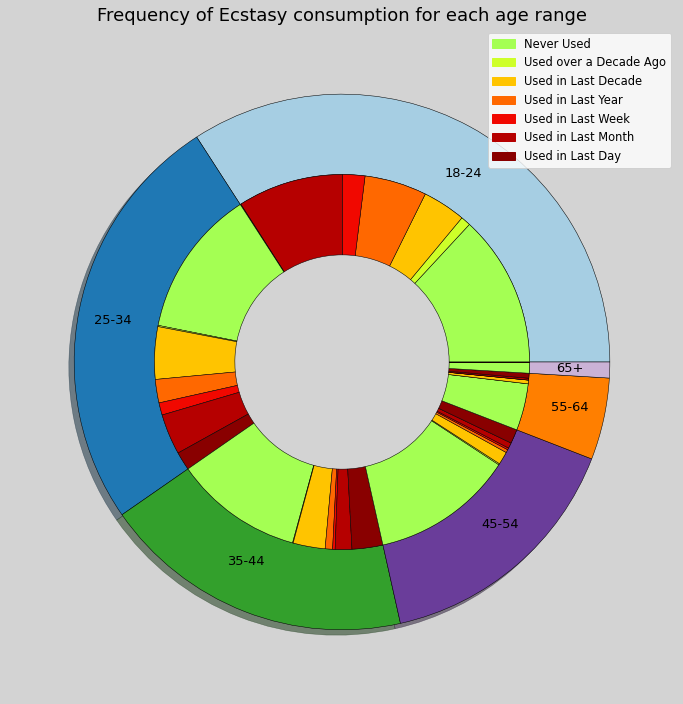

In [12]:
color = plt.cm.jet
color2= plt.cm.Paired

outer_colors = [color2(0),color2(0.15),color2(0.30),color2(0.8),color2(0.6),color2(0.7)]
inner_colors = [color(.55), color(.6), color(.7), color(.8), color(.9), color(.95), color(0.99)]*7
                
    
label1 = list(['18-24','25-34','35-44','45-54','55-64','65+'])
label2=list(['Never Used','Used in Last Day','Used in Last Decade','Used in Last Month','Used in Last Week','Used in Last Year','Used over a Decade Ago'])*6
size = 0.3
vals = dfAD['counts']
group_sum = dfAD.groupby('age')['counts'].sum()


fig, ax = plt.subplots(figsize=(12,16), facecolor="lightgrey")
        
ax.pie(group_sum, 
       radius=1,
       labels=label1,
       colors=outer_colors,
       labeldistance=0.8,
       textprops={'fontsize': 13},
       shadow = True,
       wedgeprops=dict(width=size, edgecolor='black',linewidth=0.5))

ax.pie(vals, 
       radius=1-size,
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='black',linewidth=0.5))

ax.set_title('Frequency of Ecstasy consumption for each age range',fontsize=18)


a = mpatches.Patch(color=inner_colors[0], label='Never Used')
b = mpatches.Patch(color=inner_colors[1], label='Used over a Decade Ago')
c = mpatches.Patch(color=inner_colors[2], label='Used in Last Decade')
d = mpatches.Patch(color=inner_colors[3], label='Used in Last Year')
e = mpatches.Patch(color=inner_colors[4], label='Used in Last Week')
f = mpatches.Patch(color=inner_colors[5], label='Used in Last Month')
g = mpatches.Patch(color=inner_colors[6], label='Used in Last Day')
plt.legend(handles=[a,b,c,d,e,f,g],prop={'size': 11.5})


In [13]:
world=geo.read_file(geo.datasets.get_path('naturalearth_lowres'))

dfw=df[["country","alcohol"]]
dfw["alcohol"]=dfw["alcohol"].apply(lambda x: 1 if x in ("Used in Last Week","Used in Last Day","Used in Last Month") else 0)
dfw=dfw.groupby(["country"]).agg({"alcohol":["sum","count"]})
dfw['prop']=round(dfw['alcohol','sum']/dfw['alcohol','count']*100,2)
dfw.reset_index(inplace=True)

dfw["country"]=dfw["country"].apply(lambda x: 'Ireland' if x=='Republic of Ireland' else x)
dfw["country"]=dfw["country"].apply(lambda x: 'United Kingdom' if x=='UK' else x)
dfw["country"]=dfw["country"].apply(lambda x: 'United States of America' if x=='USA' else x)

dfw=world.merge(dfw,how='left',left_on=['name'],right_on=['country'])
dfw.dropna(inplace=True)
dfw.columns = ['pop', 'continent', 'name', 'iso_a3', 'gdp_md_est','geometry','country','sum','count','prop']



mapdrug = folium.Map()

# Add the data
folium.Choropleth(
    geo_data=dfw,
    name='choropleth',
    data=dfw,
    columns=['country', 'prop'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of People who have drink alchool during the last Month per Country'
).add_to(mapdrug)

mapdrug


C:\Users\bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\bruno\Anaconda3\lib\site-packages\pandas\core\frame.py:9204: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,


In [14]:
nbUK=df.groupby("country").size()["UK"]
nbUSA=df.groupby("country").size()["USA"]

dfUSA=df[df["country"]=="USA"]

dfUSA["alcohol"]=dfUSA.alcohol.map(User)
dfUSA["amphet"]=dfUSA.amphet.map(User)
dfUSA["amyl"]=dfUSA.amyl.map(User)
dfUSA["benzos"]=dfUSA.benzos.map(User)
dfUSA["caff"]=dfUSA.caff.map(User)
dfUSA["cannabis"]=dfUSA.cannabis.map(User)
dfUSA["choc"]=dfUSA.choc.map(User)
dfUSA["coke"]=dfUSA.coke.map(User)
dfUSA["crack"]=dfUSA.crack.map(User)
dfUSA["ecstasy"]=dfUSA.ecstasy.map(User)
dfUSA["heroin"]=dfUSA.heroin.map(User)
dfUSA["ketamine"]=dfUSA.ketamine.map(User)
dfUSA["legalh"]=dfUSA.legalh.map(User)
dfUSA["lsd"]=dfUSA.lsd.map(User)
dfUSA["meth"]=dfUSA.meth.map(User)
dfUSA["mushrooms"]=dfUSA.mushrooms.map(User)
dfUSA["nicotine"]=dfUSA.nicotine.map(User)
dfUSA["semer"]=dfUSA.semer.map(User)
dfUSA["vsa"]=dfUSA.vsa.map(User)

dfUK=df[df["country"]=="UK"]

dfUK["alcohol"]=dfUK.alcohol.map(User)
dfUK["amphet"]=dfUK.amphet.map(User)
dfUK["amyl"]=dfUK.amyl.map(User)
dfUK["benzos"]=dfUK.benzos.map(User)
dfUK["caff"]=dfUK.caff.map(User)
dfUK["cannabis"]=dfUK.cannabis.map(User)
dfUK["choc"]=dfUK.choc.map(User)
dfUK["coke"]=dfUK.coke.map(User)
dfUK["crack"]=dfUK.crack.map(User)
dfUK["ecstasy"]=dfUK.ecstasy.map(User)
dfUK["heroin"]=dfUK.heroin.map(User)
dfUK["ketamine"]=dfUK.ketamine.map(User)
dfUK["legalh"]=dfUK.legalh.map(User)
dfUK["lsd"]=dfUK.lsd.map(User)
dfUK["meth"]=dfUK.meth.map(User)
dfUK["mushrooms"]=dfUK.mushrooms.map(User)
dfUK["nicotine"]=dfUK.nicotine.map(User)
dfUK["semer"]=dfUK.semer.map(User)
dfUK["vsa"]=dfUK.vsa.map(User)

dfUSA = dfUSA.drop(dfUSA.columns[0:12], 1)
dfUK = dfUK.drop(dfUK.columns[0:12], 1)

labels=dfUSA.columns

valuesUSA=[]
valuesUK=[]

for i in labels :
    try :
        valuesUSA.append(dfUSA[i].value_counts()["User"])
    except :
        valuesUSA.append(0)
        
    try : 
        valuesUK.append(dfUK[i].value_counts()["User"])
    except :
        valuesUK.append(0)

#Conversion pourcentages : 
def convPourcentage (liste,nb):
    for i in range(len(liste)):
        liste[i]=round(liste[i]*100/nb,1)
    return liste

valuesUSA=convPourcentage(valuesUSA,nbUSA)
valuesUK=convPourcentage(valuesUK,nbUK)

C:\Users\bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

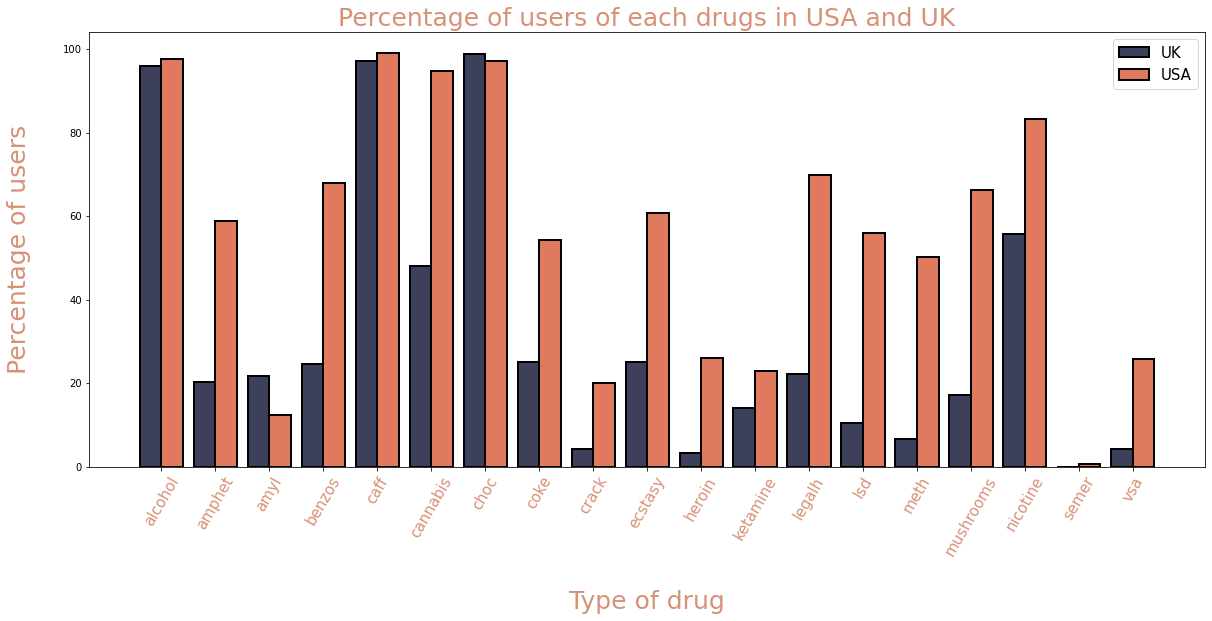

In [15]:
largeur_barre = 0.4 # Largeur de chaque barre : 

# attention si valeur trop grande, il n'y aura pas de différence entre chaque paquet de barres
plt.figure(figsize=(20,8))

x1 = range(len(valuesUK)) # Position des barres de la catégorie 1

x2 = [i + largeur_barre for i in x1] # Position des barres de la cat 2


plt.bar(x1, valuesUK, width = largeur_barre, color = '#3d405b', # Barres cat 1

           edgecolor = 'black', linewidth = 2)

plt.bar(x2, valuesUSA, width = largeur_barre, color = '#e07a5f', # Barres cat 2

           edgecolor = ['black' for i in valuesUK], linewidth = 2)

plt.xticks([r + largeur_barre / 2 for r in range(len(valuesUK))], # Etiquettes

              labels)
plt.xlabel('\nType of drug', fontsize=25, color='#D79176')
plt.xticks(rotation= 60, fontsize=15,color='#D79176')
plt.ylabel("Percentage of users\n", fontsize=25, color='#D79176')
plt.title("Percentage of users of each drugs in USA and UK",fontsize=25, color='#D79176')
plt.legend(["UK","USA"],loc='upper right',fontsize=15)

## 3. Machine Learning



### a/ Dataset

In [16]:
print(df["ecstasy"].unique())

['Used in Last Month' 'Never Used' 'Used over a Decade Ago'
 'Used in Last Year' 'Used in Last Decade' 'Used in Last Day'
 'Used in Last Week']


In [17]:
dfml=df.copy()
dfml.drop(columns=['caff', 'choc','legalh','mushrooms','nicotine','alcohol',],inplace=True)
dfml["semer"]=dfml["semer"].apply(lambda x: 1 if x in ('Used in Last Month', 'Used over a Decade Ago','Used in Last Year', 'Used in Last Decade', 'Used in Last Day','Used in Last Week') else 0)
dfml.drop(dfml[dfml['semer']==1].index, inplace=True)
#8 liers have been removed
dfml.drop(columns=['semer'],inplace=True)
drugList=['amphet','amyl', 'benzos', 'cannabis', 'coke', 'crack', 'ecstasy', 'heroin','ketamine', 'lsd', 'meth', 'vsa']
for i in drugList:
    dfml[i]=dfml[i].map(User)




condition = ((dfml['amphet'] != 'User') & 
             (dfml['amyl'] != 'User') &
             (dfml['benzos'] != 'User') &
             (dfml['cannabis'] != 'User') &
             (dfml['coke'] != 'User') &
             (dfml['crack'] != 'User') &
             (dfml['ecstasy'] != 'User') &
             (dfml['heroin'] != 'User') &
             (dfml['ketamine'] != 'User') &
             (dfml['lsd'] != 'User') &
             (dfml['meth'] != 'User') &
             (dfml['vsa'] != 'User'))


dfml.loc[condition, 'Drug'] = 0
dfml.loc[~condition, 'Drug'] = 1

for i in drugList:
    dfml.drop(columns=[i],inplace=True)

dfml.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss,Drug
id,,,,,,,,,,,,,
2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,-0.71126,-0.21575,1.0
3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,34,-1.37983,0.40148,1.0
4,18-24,Female,Masters degree,UK,White,34,34,46,47,46,-1.37983,-1.18084,1.0
5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,-0.21712,-0.21575,1.0
6,65+,Female,Left school at 18 years,Canada,White,29,38,35,55,52,-1.37983,-1.54858,0.0


In [18]:
#Then we replace other cateorical variables by continuous value.
dfml=pd.get_dummies(dfml,columns=['gender', 'country',"ethnicity"])

dfml["age"]=dfml["age"].apply(lambda x: random.randrange(25, 34) if x=='25-34' else x)
dfml["age"]=dfml["age"].apply(lambda x: random.randrange(18, 24) if x=='18-24' else x)
dfml["age"]=dfml["age"].apply(lambda x: random.randrange(35, 44) if x=='35-44' else x)
dfml["age"]=dfml["age"].apply(lambda x: random.randrange(45, 54) if x=='45-54' else x)
dfml["age"]=dfml["age"].apply(lambda x: random.randrange(55, 64) if x=='55-64' else x)
dfml["age"]=dfml["age"].apply(lambda x: random.randrange(65, 100) if x=='65+' else x)

dfml["education"].unique()

dfml["education"]=dfml["education"].apply(lambda x:0  if x=='Left school before 16 years' else x)
dfml["education"]=dfml["education"].apply(lambda x:1  if x=='Left school at 16 years' else x)
dfml["education"]=dfml["education"].apply(lambda x:2  if x=='Left school at 17 years' else x)
dfml["education"]=dfml["education"].apply(lambda x:3  if x=='Left school at 18 years' else x)
dfml["education"]=dfml["education"].apply(lambda x:4  if x=="Some college or university, no certificate or degree" else x)
dfml["education"]=dfml["education"].apply(lambda x:5  if x=="Professional certificate/ diploma" else x)
dfml["education"]=dfml["education"].apply(lambda x:6  if x=="University degree" else x)
dfml["education"]=dfml["education"].apply(lambda x:7  if x=="Masters degree" else x)
dfml["education"]=dfml["education"].apply(lambda x:8  if x=="Doctorate degree" else x)

dfml.head()

,age,education,nscore,escore,oscore,ascore,cscore,impulsive,ss,Drug,...,country_Republic of Ireland,country_UK,country_USA,ethnicity_Asian,ethnicity_Black,ethnicity_Mixed-Black/Asian,ethnicity_Mixed-White/Asian,ethnicity_Mixed-White/Black,ethnicity_Other,ethnicity_White
id,,,,,,,,,,,,,,,,,,,,,
2,33,8,29,52,55,48,41,-0.71126,-0.21575,1.0,...,0,1,0,0,0,0,0,0,0,1
3,36,5,31,45,40,32,34,-1.37983,0.40148,1.0,...,0,1,0,0,0,0,0,0,0,1
4,19,7,34,34,46,47,46,-1.37983,-1.18084,1.0,...,0,1,0,0,0,0,0,0,0,1
5,40,8,43,28,43,41,50,-0.21712,-0.21575,1.0,...,0,1,0,0,0,0,0,0,0,1
6,96,3,29,38,35,55,52,-1.37983,-1.54858,0.0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#Finally we scaled the data
from sklearn.preprocessing import MinMaxScaler
dfml = pd.DataFrame(MinMaxScaler().fit_transform(dfml), columns=dfml.columns)
dfml.head()

,age,education,nscore,escore,oscore,ascore,cscore,impulsive,ss,Drug,...,country_Republic of Ireland,country_UK,country_USA,ethnicity_Asian,ethnicity_Black,ethnicity_Mixed-Black/Asian,ethnicity_Mixed-White/Asian,ethnicity_Mixed-White/Black,ethnicity_Other,ethnicity_White
0,0.192308,1.000,0.354167,0.837209,0.861111,0.750000,0.571429,0.337920,0.465658,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.230769,0.625,0.395833,0.674419,0.444444,0.416667,0.404762,0.215401,0.619957,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.012821,0.875,0.458333,0.418605,0.611111,0.729167,0.690476,0.215401,0.224398,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.282051,1.000,0.645833,0.279070,0.527778,0.604167,0.785714,0.428474,0.465658,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.375,0.354167,0.511628,0.305556,0.895833,0.833333,0.215401,0.132468,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
